# 1.2 Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

__Source__ : https://pandas.pydata.org/

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Pandas version ' + pd.__version__)

Pandas version 0.22.0


### Series / DataFrame

In [60]:
# Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [61]:
# DataFrame
df = pd.DataFrame(np.random.randn(6,4))
df

,0,1,2,3
0,0.927471,0.460716,1.331053,1.266279
1,-0.502746,1.672035,1.741606,0.446724
2,-0.568314,2.297810,-0.014705,-1.836749
3,2.731004,-1.042793,-0.033656,0.068383
4,1.165972,0.846722,-0.832185,-1.735390
5,0.217204,1.408227,-1.189341,0.157253


In [62]:
# Adding column names and index
df = pd.DataFrame(np.random.randn(6,4),columns = ['C1','C2','C3','C4'], index = s)
df

,C1,C2,C3,C4
1.0,-1.214507,1.842181,0.899533,-1.924278
3.0,-0.189063,-0.286969,-0.052641,-0.704115
5.0,-1.318992,-0.909581,-0.030689,0.562641
NaN,0.092459,-0.518779,0.423656,-0.656279
6.0,-0.495307,-0.224911,0.128166,0.259623
8.0,-0.007036,-0.528004,-0.210785,-0.724396


In [63]:
# Lists to DataFrame
names = ['Bob','Jéssica','Maria','João','Mel']
births = [968, 155, None, 578, 973]
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jéssica', 155), ('Maria', None), ('João', 578), ('Mel', 973)]

In [64]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968.0
1,Jéssica,155.0
2,Maria,NaN
3,João,578.0
4,Mel,973.0


In [65]:
# Dictionaries to DataFrame
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [66]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


### Import / Export

In [67]:
# Save to csv file format
df.to_csv('foo.csv',index=False,header=False)

In [68]:
#Location = 'C:/Users/drt44753/Desktop/Pandas/'
Location = ""
pd.read_csv(Location+'foo.csv',encoding="latin1")

,Bob,968.0
0,JÃ©ssica,155.0
1,Maria,NaN
2,JoÃ£o,578.0
3,Mel,973.0


In [69]:
# Reading from csv
pd.read_csv(Location+'foo.csv',header=None,encoding="utf-8")

,0,1
0,Bob,968.0
1,Jéssica,155.0
2,Maria,NaN
3,João,578.0
4,Mel,973.0


In [70]:
# Save to excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [71]:
# Read from excel
df = pd.read_excel('foo.xlsx', 'Sheet1')
df

,Names,Births
0,Bob,968.0
1,Jéssica,155.0
2,Maria,NaN
3,João,578.0
4,Mel,973.0


### Adding and deleting columns or rows 

In [72]:
# Creating a dataframe
d = [0,1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(d)
df.columns = ['Col1']
df

,Col1
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [73]:
# Adding new columns
df['NewCol1'] = 5
df['NewCol2'] = df['NewCol1'] + df['Col1']
df2 = df # df2 is used in next topic
df

,Col1,NewCol1,NewCol2
0,0,5,5
1,1,5,6
2,2,5,7
3,3,5,8
4,4,5,9
5,5,5,10
6,6,5,11
7,7,5,12
8,8,5,13
9,9,5,14


In [74]:
# Dropping columns
df = df.drop(columns=['NewCol1'])
df

,Col1,NewCol2
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9
5,5,10
6,6,11
7,7,12
8,8,13
9,9,14


In [75]:
# Another way to drop columns (directly in memory)
del df['NewCol2']
df

,Col1
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


### Indexing and selecting elements 

In [76]:
# Adding indexes
df = df2
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
df

,Col1,NewCol1,NewCol2
a,0,5,5
b,1,5,6
c,2,5,7
d,3,5,8
e,4,5,9
f,5,5,10
g,6,5,11
h,7,5,12
i,8,5,13
j,9,5,14


In [77]:
# Selecting elements using loc
df.loc['a']

Col1       0
NewCol1    5
NewCol2    5
Name: a, dtype: int64

In [78]:
df.loc['a':'d','Col1':'NewCol1']

,Col1,NewCol1
a,0,5
b,1,5
c,2,5
d,3,5


In [79]:
# Getting index for using loc
df.loc[df.index[0:3],['Col1','NewCol2']]

,Col1,NewCol2
a,0,5
b,1,6
c,2,7


In [80]:
# Selecting elements using iloc
# Note: .iloc is strictly integer position based.
df.iloc[0:3]

,Col1,NewCol1,NewCol2
a,0,5,5
b,1,5,6
c,2,5,7


In [81]:
df.iloc[0:3,1:3]

,NewCol1,NewCol2
a,5,5
b,5,6
c,5,7


In [82]:
# Selecting row elements using []
df[0:2]

,Col1,NewCol1,NewCol2
a,0,5,5
b,1,5,6


In [83]:
#Selecting columns elements using []
df[["Col1","NewCol1"]]

,Col1,NewCol1
a,0,5
b,1,5
c,2,5
d,3,5
e,4,5
f,5,5
g,6,5
h,7,5
i,8,5
j,9,5


In [84]:
# Head prints first 5 lines of the DataFrame
df.head()

,Col1,NewCol1,NewCol2
a,0,5,5
b,1,5,6
c,2,5,7
d,3,5,8
e,4,5,9


In [85]:
# Or you can choose how many lines
df.head(2)

,Col1,NewCol1,NewCol2
a,0,5,5
b,1,5,6


In [86]:
# Tail prints last 5 lines of the DataFrame
df.tail()

,Col1,NewCol1,NewCol2
f,5,5,10
g,6,5,11
h,7,5,12
i,8,5,13
j,9,5,14


In [99]:
# Filtering using single column condition
df[df.Col1 > 6]

,Col1,NewCol1,NewCol2
h,7,5,12
i,8,5,13
j,9,5,14


In [100]:
# Filtering all values in the DataFrame
df[df > 7]

,Col1,NewCol1,NewCol2
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,8.0
e,NaN,NaN,9.0
f,NaN,NaN,10.0
g,NaN,NaN,11.0
h,NaN,NaN,12.0
i,8.0,NaN,13.0
j,9.0,NaN,14.0


In [102]:
# Filtering using isin function (works for string too)
numbers = [3,4,7]
df[df['Col1'].isin(numbers)]

,Col1,NewCol1,NewCol2
d,3,5,8
e,4,5,9
h,7,5,12


### Group by

In [35]:
# Our small data set
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df = pd.DataFrame({'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']})
df

,letter,one,two
0,a,1,2
1,a,1,2
2,b,1,2
3,b,1,2
4,c,1,2


In [36]:
# Create group object
one = df.groupby('letter')

# Apply sum function
one.sum()

,one,two
letter,,
a,2,4
b,2,4
c,1,2


In [37]:
# Group by two objects
letterone = df.groupby(['letter','one']).sum()
letterone

,,two
letter,one,
a,1,4
b,1,4
c,1,2


In [38]:
# MultiIndexes
letterone.index

MultiIndex(levels=[['a', 'b', 'c'], [1]],
           labels=[[0, 1, 2], [0, 0, 0]],
           names=['letter', 'one'])

In [39]:
# Without MultiIndexes
letterone = df.groupby(['letter','one'], as_index=False).sum()
letterone

,letter,one,two
0,a,1,4
1,b,1,4
2,c,1,2


In [40]:
letterone.index

Int64Index([0, 1, 2], dtype='int64')

### Apply and rolling

In [41]:
# Apply to a specific column
captalizer = lambda x: x.upper()
letterone['letter'] = letterone['letter'].apply(captalizer)
letterone

,letter,one,two
0,A,1,4
1,B,1,4
2,C,1,2


In [42]:
# Apply to multiple columns (dtypes)
def times10(x):
    if type(x) is int:
        return 10 * x
    return x

letterone.applymap(times10)

,letter,one,two
0,A,10,40
1,B,10,40
2,C,10,20


In [43]:
# Window size of 2 calculating mean
df.rolling(2).mean()

,letter,one,two
0,a,NaN,NaN
1,a,1.0,2.0
2,b,1.0,2.0
3,b,1.0,2.0
4,c,1.0,2.0


In [44]:
# Window size of 3 calculating sum
df.rolling(3).sum()

,letter,one,two
0,a,NaN,NaN
1,a,NaN,NaN
2,b,3.0,6.0
3,b,3.0,6.0
4,c,3.0,6.0


### Merge and Join

In [45]:
# Concatenando dois DataFrames por linha

dict1 = { 'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

dict2 = { 'subject_id': ['6', '7', '8'],
        'first_name': ['Bran', 'Bryce', 'Betty'], 
        'last_name': ['Balwner', 'Brice', 'Btisan']}

df1 = pd.DataFrame(dict1, columns = ['subject_id', 'first_name', 'last_name'])
df2 = pd.DataFrame(dict2, columns = dict2.keys())
pd.concat([df1, df2])

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,6,Bran,Balwner
1,7,Bryce,Brice
2,8,Betty,Btisan


In [46]:
# Concatenar por coluna
pd.concat([df1, df2], axis=1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,6,Bran,Balwner
1,2,Amy,Ackerman,7,Bryce,Brice
2,3,Allen,Ali,8,Betty,Btisan
3,4,Alice,Aoni,NaN,NaN,NaN
4,5,Ayoung,Atiches,NaN,NaN,NaN


In [47]:
# Joining
dict3 = { 'subject_id': ['1', '2', '3', '4', '5', '7', '8'],
        'age': [51, 15, 15, 61, 16, 14, 15]}
df3 = pd.DataFrame(dict3, columns = ['subject_id','age'])
pd.merge(df1, df3, on='subject_id')

,subject_id,first_name,last_name,age
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16


In [48]:
# Joining using "how"
pd.merge(df1, df3, on='subject_id', how="right")

,subject_id,first_name,last_name,age
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16
5,7,NaN,NaN,14
6,8,NaN,NaN,15


### Melt

In [49]:
# Creating DataFrame
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [50]:
# Melting 1 variable
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [51]:
# Melting multiple variables
df1 = pd.melt(df, id_vars=['A'], value_vars=['B','C'], var_name='myVarname', value_name='myValname')
df1

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [52]:
# Pivoting
# Note: indexes must be unique or pandas will give an error
df2 = df1.pivot(index='A', columns='myVarname',values='myValname')
df2

myVarname,B,C
A,,
a,1,2
b,3,4
c,5,6


### Plotting

In [53]:
import matplotlib.pyplot as plt

# Enable inline plotting for jupyter
%matplotlib inline

In [110]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


###### Most ordered Items

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


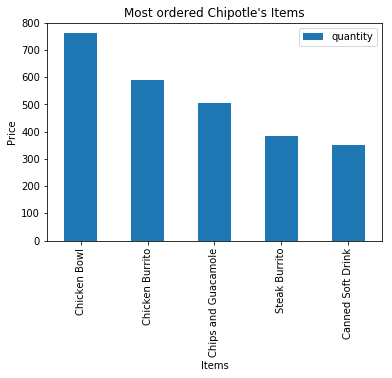

In [107]:
# Grouping by item_name to summarise quantity
letter_counts = chipo[["item_name","quantity"]].groupby(["item_name"]).sum()

# Sort the values from the top to the least value and take the first 5 items
df = letter_counts.sort_values(by="quantity",ascending=False).head(5)

# Create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
df

###### Number of items ordered per order price

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


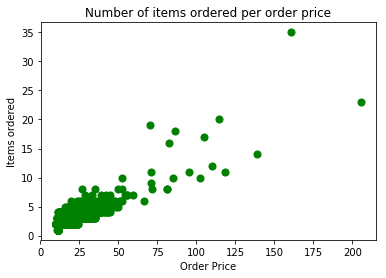

In [111]:
# Create a list of prices (converts to float and remove $)
chipo.item_price = [float(value[1:]) for value in chipo.item_price]

# Groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# Creates the scatterplot
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
orders.head(5)